In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:

dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int,\
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float,\
              'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int,\
              'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

sales = pd.read_csv("kc_house_data.csv", dtype = dtype_dict)
train_data = pd.read_csv("kc_house_train_data.csv", dtype = dtype_dict)
test_data = pd.read_csv("kc_house_test_data.csv", dtype = dtype_dict)


In [9]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [11]:
prices = sales['price'] # extract the price column of the sales dataframe
print("average_price:",prices.mean())
print("sum of squared prices:", (prices*prices).sum())

average_price: 540088.1417665294
sum of squared prices: 9217325138472070.0


In [41]:
#Simple Linear regression using closed form solution

def simple_linear_regression(X, y):
    
    # compute the mean of  input_feature and output
    X_mean = X.mean()
    y_mean = y.mean()
    
    Xy = X*y
    Xy_mean = Xy.mean()
    
    X_square = X*X
    XX_mean = X_square.mean()
    
    numerator = Xy_mean - (X_mean)*(y_mean)
    denominator = XX_mean - (X_mean)*(X_mean)
    
    slope = numerator/denominator
    intercept = y_mean - slope*X_mean
    
    
    return intercept, slope
    

In [42]:
test_feature = np.array(range(5))
test_output = np.array(1 + 1*test_feature)
(test_intercept, test_slope) =  simple_linear_regression(test_feature, test_output)
print("Intercept: " + str(test_intercept))
print("Slope: " + str(test_slope))

Intercept: 1.0
Slope: 1.0


In [43]:
theta_0, theta_1 = simple_linear_regression(train_data['sqft_living'], train_data['price'])
print("intercept:", theta_0)
print("slope:", theta_1)

intercept: -47116.07907289488
slope: 281.95883963034294


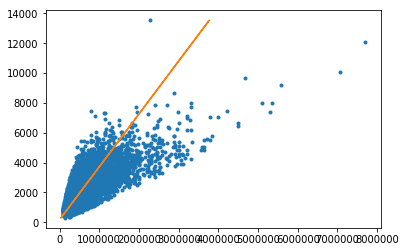

In [51]:
plt.plot(train_data['price'],train_data['sqft_living'],'.')
plt.plot(list(theta_0+theta_1*train_data['sqft_living']),train_data['sqft_living'],'-')

In [52]:
def rss(X, y, intercept, slope):
    predicted_y = intercept + slope*X
    residuals = y - predicted_y
    return (residuals*residuals).sum()
    

In [60]:
SSR = rss(train_data['sqft_living'], train_data['price'], theta_0, theta_1)
print(SSR)
SSR = rss(test_data['sqft_living'], test_data['price'], theta_0, theta_1)
print(SSR)

1201918354177283.0
275402933617812.16


In [55]:
# Estimate the slope and intercept for predicting 'price' based on 'bedrooms'
w_0, w_1 = simple_linear_regression(train_data['bedrooms'], train_data['price'])
print("intercept:", w_0)
print("slope:", w_1)

intercept: 109473.17762295791
slope: 127588.95293398833


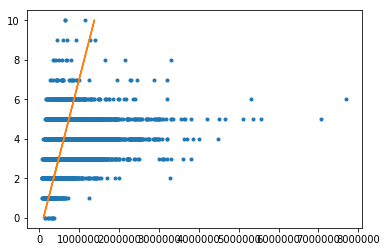

In [56]:
plt.plot(train_data['price'],train_data['bedrooms'],'.', list(w_0+w_1*train_data['bedrooms']),train_data['bedrooms'],'-')

In [57]:
SSR = rss(test_data['bedrooms'], test_data['price'], w_0, w_1)
print(SSR)

493364585960301.0


In [58]:
def price_prediction(sqft_living, intercept, slope):
    return (intercept + slope*sqft_living)    

In [59]:
print(price_prediction(2650, theta_0, theta_1))

700074.8459475139


In [62]:
def sqft_prediction(price, intercept, slope):
    return (price - intercept)/slope

In [63]:
print(sqft_prediction(800000,theta_0, theta_1))

3004.3962451522752
